**Работу выполнил Писаренко Сергей**

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re


In [2]:
RANDOM_STATE = 42

random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Сиды фиксируются, чтобы при выполнении кода выдавались одинаковые результаты работы генератора псевдослучайных чисел. С помощью этого можно получать одинаковые выходные данные при каждом новом запуске программы.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

**1)** 10 случайных строк тренировочного датасета

In [4]:
df_train.sample(10, random_state=RANDOM_STATE)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


**2)** Первые 5 и последние 5 объектов тестового датасета

In [5]:
pd.concat([df_train.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


**3)** Пропуски в датасете.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


В датасете **есть пропуски** для test и train. Пропуски значений находятся в колонках: **mileage, engine, max_power, torque, seats**

**4)**  Явные дубликаты в данных

In [8]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(985, 62)

В данных есть явные дубликаты в тренировочной и тестовой выборках

**Бонус 5)** Построим дашборд

In [9]:
!pip install ydata-profiling -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.9 MB/s eta 0:00:00


In [10]:
from ydata_profiling import ProfileReport

# Сохранение дашборда в report.html. В ноутбуке не будет отображаться, лежит отдельным html-файлом
ProfileReport(df_train).to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

Прежде чем заполнять значения медианой следует привести категориальные значения (в колонках с пропусками) к численным значениям.  
**Все эти действия прописаны в задании 3, выполню их здесь**  


В столбце mileage есть измерения в kmpl и km/kg. Первые измеряются как расстояние на литр, вторые - расстояние на кг.  
Плотность бензина - $760 кг/м^3$  

In [11]:
def mileage_to_kmpl(mileage: str) -> float:
    value, measure = mileage.split(' ')
    val = np.nan
    if measure == 'kmpl':
        val = float(value)
    else:
        val = float(value) * (1000 / 760)
    if val == 0:
        return np.nan
    return val

In [12]:
df_train['mileage'] = df_train['mileage'].map(lambda m: mileage_to_kmpl(m) if isinstance(m, str) else m)
df_test['mileage'] = df_test['mileage'].map(lambda m: mileage_to_kmpl(m) if isinstance(m, str) else m)

Столбец engine стоит перевести в тип int, отбросив "CC"

In [13]:
df_train['engine'] = df_train['engine'].map(lambda m: int(m.split(' ')[0]) if isinstance(m, str) else m)
df_test['engine'] = df_test['engine'].map(lambda m: int(m.split(' ')[0]) if isinstance(m, str) else m)

Столбец max_power следует привести к float. В столбце есть значение '0', которое стоит считать за пропуск (заменю на nan)

In [14]:
df_train['max_power'] = df_train['max_power'].map(lambda m: (np.nan if (len(m.split(' ')[0]) == 0 or m == '0') else float(m.split(' ')[0])) if isinstance(m, str) else m)
df_test['max_power'] = df_test['max_power'].map(lambda m: (np.nan if (len(m.split(' ')[0]) == 0 or m == '0') else float(m.split(' ')[0])) if isinstance(m, str) else m)

Столбец torque следует разделить на два: torque_value, rpm_value  
В первый столбец пойдет значение в Н*м, во второй - rpm

In [15]:
def to_torque_value(torque: str, value: str) -> float:
    is_kgm = re.findall(r'kgm', torque, flags=re.IGNORECASE)
    if is_kgm:
        return float(value)*9.80665
    else:
        return float(value)


def to_rpm_value(torque: str, values: list[str]) -> float:
    # rpm считаю как среднее
    with_err = re.findall(r'\+\s*/\s*-', torque)
    values_count = len(values)
    if values_count < 1:
        return np.nan
    elif with_err:
        return float(values[0])
    else:
        rpms = 0
        for rpm in values:
            rpms = rpms+float(rpm)
        return rpms / values_count

def torque_to_values(df):
    torque_values = []
    rpm_values = []
    for row in df['torque']:
        torque_value = np.nan
        rpm_value = np.nan
        if isinstance(row, str):
            str_row = row.replace(',', '')
            values = re.findall(r'[\d.]+', str_row)
            torque_value = to_torque_value(str_row, values[0])
            rpm_value = to_rpm_value(str_row, values[1:])
        torque_values.append(torque_value)
        rpm_values.append(rpm_value)

    df['torque_value'] = torque_values
    df['rpm_value'] = rpm_values

In [16]:
torque_to_values(df_train)
torque_to_values(df_test)

df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

Перед заполнением пропусков можно посмотреть на описание числовых столбцов, чтобы сравнить после их заполнения

In [17]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_value,rpm_value
count,6999.000000,6.999000e+03,6.999000e+03,6781.000000,6797.000000,6796.000000,6797.000000,6796.000000,6768.000000
mean,2013.818403,6.395152e+05,6.958462e+04,19.553659,1458.327203,91.580806,5.419008,181.322422,2888.100598
std,4.053095,8.089419e+05,5.772400e+04,4.098324,501.183890,35.734052,0.965767,118.166316,996.482287
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,32.800000,2.000000,47.071920,1269.350000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.050000,5.000000,111.800000,2000.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.330000,1248.000000,82.000000,5.000000,170.000000,2400.000000
75%,2017.000000,6.750000e+05,9.700000e+04,22.320000,1582.000000,102.000000,5.000000,209.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,44.000000,3604.000000,400.000000,14.000000,3726.527000,21800.000000


In [18]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_value,rpm_value
count,1000.000000,1.000000e+03,1000.000000,980.000000,981.000000,981.000000,981.000000,981.000000,977.000000
mean,2013.681000,6.179010e+05,71393.341000,19.418193,1458.882773,91.015627,5.410805,177.958590,2904.807165
std,4.012149,7.585539e+05,48486.218662,4.041782,526.228560,35.207383,0.919985,104.705991,961.441074
min,1995.000000,3.100000e+04,1303.000000,9.500000,624.000000,34.200000,4.000000,48.000000,1470.000000
25%,2011.000000,2.500000e+05,37000.000000,16.515000,1197.000000,69.000000,5.000000,110.000000,2125.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,5.000000,171.600000,2500.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.000000,102.000000,5.000000,213.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,42.447368,3604.000000,280.000000,9.000000,1421.964250,5000.000000


Заполним пропуски с помощью SimpleImputer

In [19]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median')
df_train[df_train.select_dtypes(include='number').columns] = si.fit_transform(df_train[df_train.select_dtypes(include='number').columns])
df_test[df_test.select_dtypes(include='number').columns] = si.transform(df_test[df_test.select_dtypes(include='number').columns])

In [20]:
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   float64
 2   selling_price  6999 non-null   float64
 3   km_driven      6999 non-null   float64
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6999 non-null   float64
 9   engine         6999 non-null   float64
 10  max_power      6999 non-null   float64
 11  seats          6999 non-null   float64
 12  torque_value   6999 non-null   float64
 13  rpm_value      6999 non-null   float64
dtypes: float64(9), object(5)
memory usage: 765.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null 

(None, None)

### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [21]:
df_feature_columns = df_train.columns.drop('selling_price')
df_train[df_train.duplicated(subset=df_feature_columns)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_value,rpm_value
254,Hyundai Grand i10 Sportz,2017.0,450000.0,35000.0,Petrol,Individual,Manual,First Owner,18.90,1197.0,82.00,5.0,114.0,4000.0
258,Maruti Swift VXI,2012.0,330000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.80,5.0,114.0,4000.0
268,Maruti Swift Dzire VXI,2014.0,400000.0,70000.0,Petrol,Individual,Manual,Second Owner,19.10,1197.0,85.80,5.0,114.0,4000.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017.0,2625000.0,9000.0,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177.00,5.0,430.0,2125.0
325,Lexus ES 300h,2019.0,5150000.0,20000.0,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5.0,202.0,4400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010.0,140000.0,60000.0,Petrol,Individual,Manual,Second Owner,18.00,995.0,62.00,5.0,90.3,4200.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018.0,746000.0,24000.0,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,5.0,215.0,2375.0
6989,Maruti Swift Dzire VDI,2015.0,625000.0,50000.0,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,5.0,190.0,2000.0
6997,Tata Indigo CR4,2013.0,290000.0,25000.0,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0,140.0,2400.0


В трейне 1159 объектов с одинаковым признаковым описанием

Удалим дубликаты признаковых описаний, оставив первую из дублирующихся строк (keep='first'). Индексы будут идти от 0 без пропусков (ignore_index=True)

In [22]:
df_train.drop_duplicates(subset=df_feature_columns, keep='first', ignore_index=True, inplace=True)

In [23]:
# Столбец torque обработал и разделил на 2 новых, поэтому столбцов 14, а не 13
# assert df_train.shape == (5840, 13)
assert df_train.shape == (5840, 14)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Данное задание было выполнено ранее

In [24]:
# your code here
# Было выполнено в Задании 1

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [25]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [26]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_value,rpm_value
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.566963,1429.448973,87.952905,5.426712,176.250684,2849.064187
std,4.095622,5.354320e+05,6.007114e+04,4.045600,485.662834,31.577030,0.982344,116.727183,974.015357
min,1983.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,32.800000,2.000000,47.071920,1269.350000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,5.000000,111.800000,2000.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.330000,1248.000000,82.000000,5.000000,170.000000,2400.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000,200.055660,3750.000000
max,2020.000000,1.000000e+07,2.360457e+06,44.000000,3604.000000,400.000000,14.000000,3726.527000,21800.000000


In [27]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,torque_value,rpm_value
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.416429,1454.87600,90.844330,5.403000,177.807377,2893.196600
std,4.012149,7.585539e+05,48486.218662,4.001139,521.99574,34.892709,0.912921,103.711206,953.320091
min,1995.000000,3.100000e+04,1303.000000,9.500000,624.00000,34.200000,4.000000,48.000000,1470.000000
25%,2011.000000,2.500000e+05,37000.000000,16.735000,1197.00000,69.000000,5.000000,111.700000,2125.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,82.425000,5.000000,170.000000,2400.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.00000,102.000000,5.000000,205.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,42.447368,3604.00000,280.000000,9.000000,1421.964250,5000.000000


In [28]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [29]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [30]:
# assert df_train.shape == (5840, 13)
assert df_train.shape == (5840, 14) # Доп столбец из 1 пункта

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

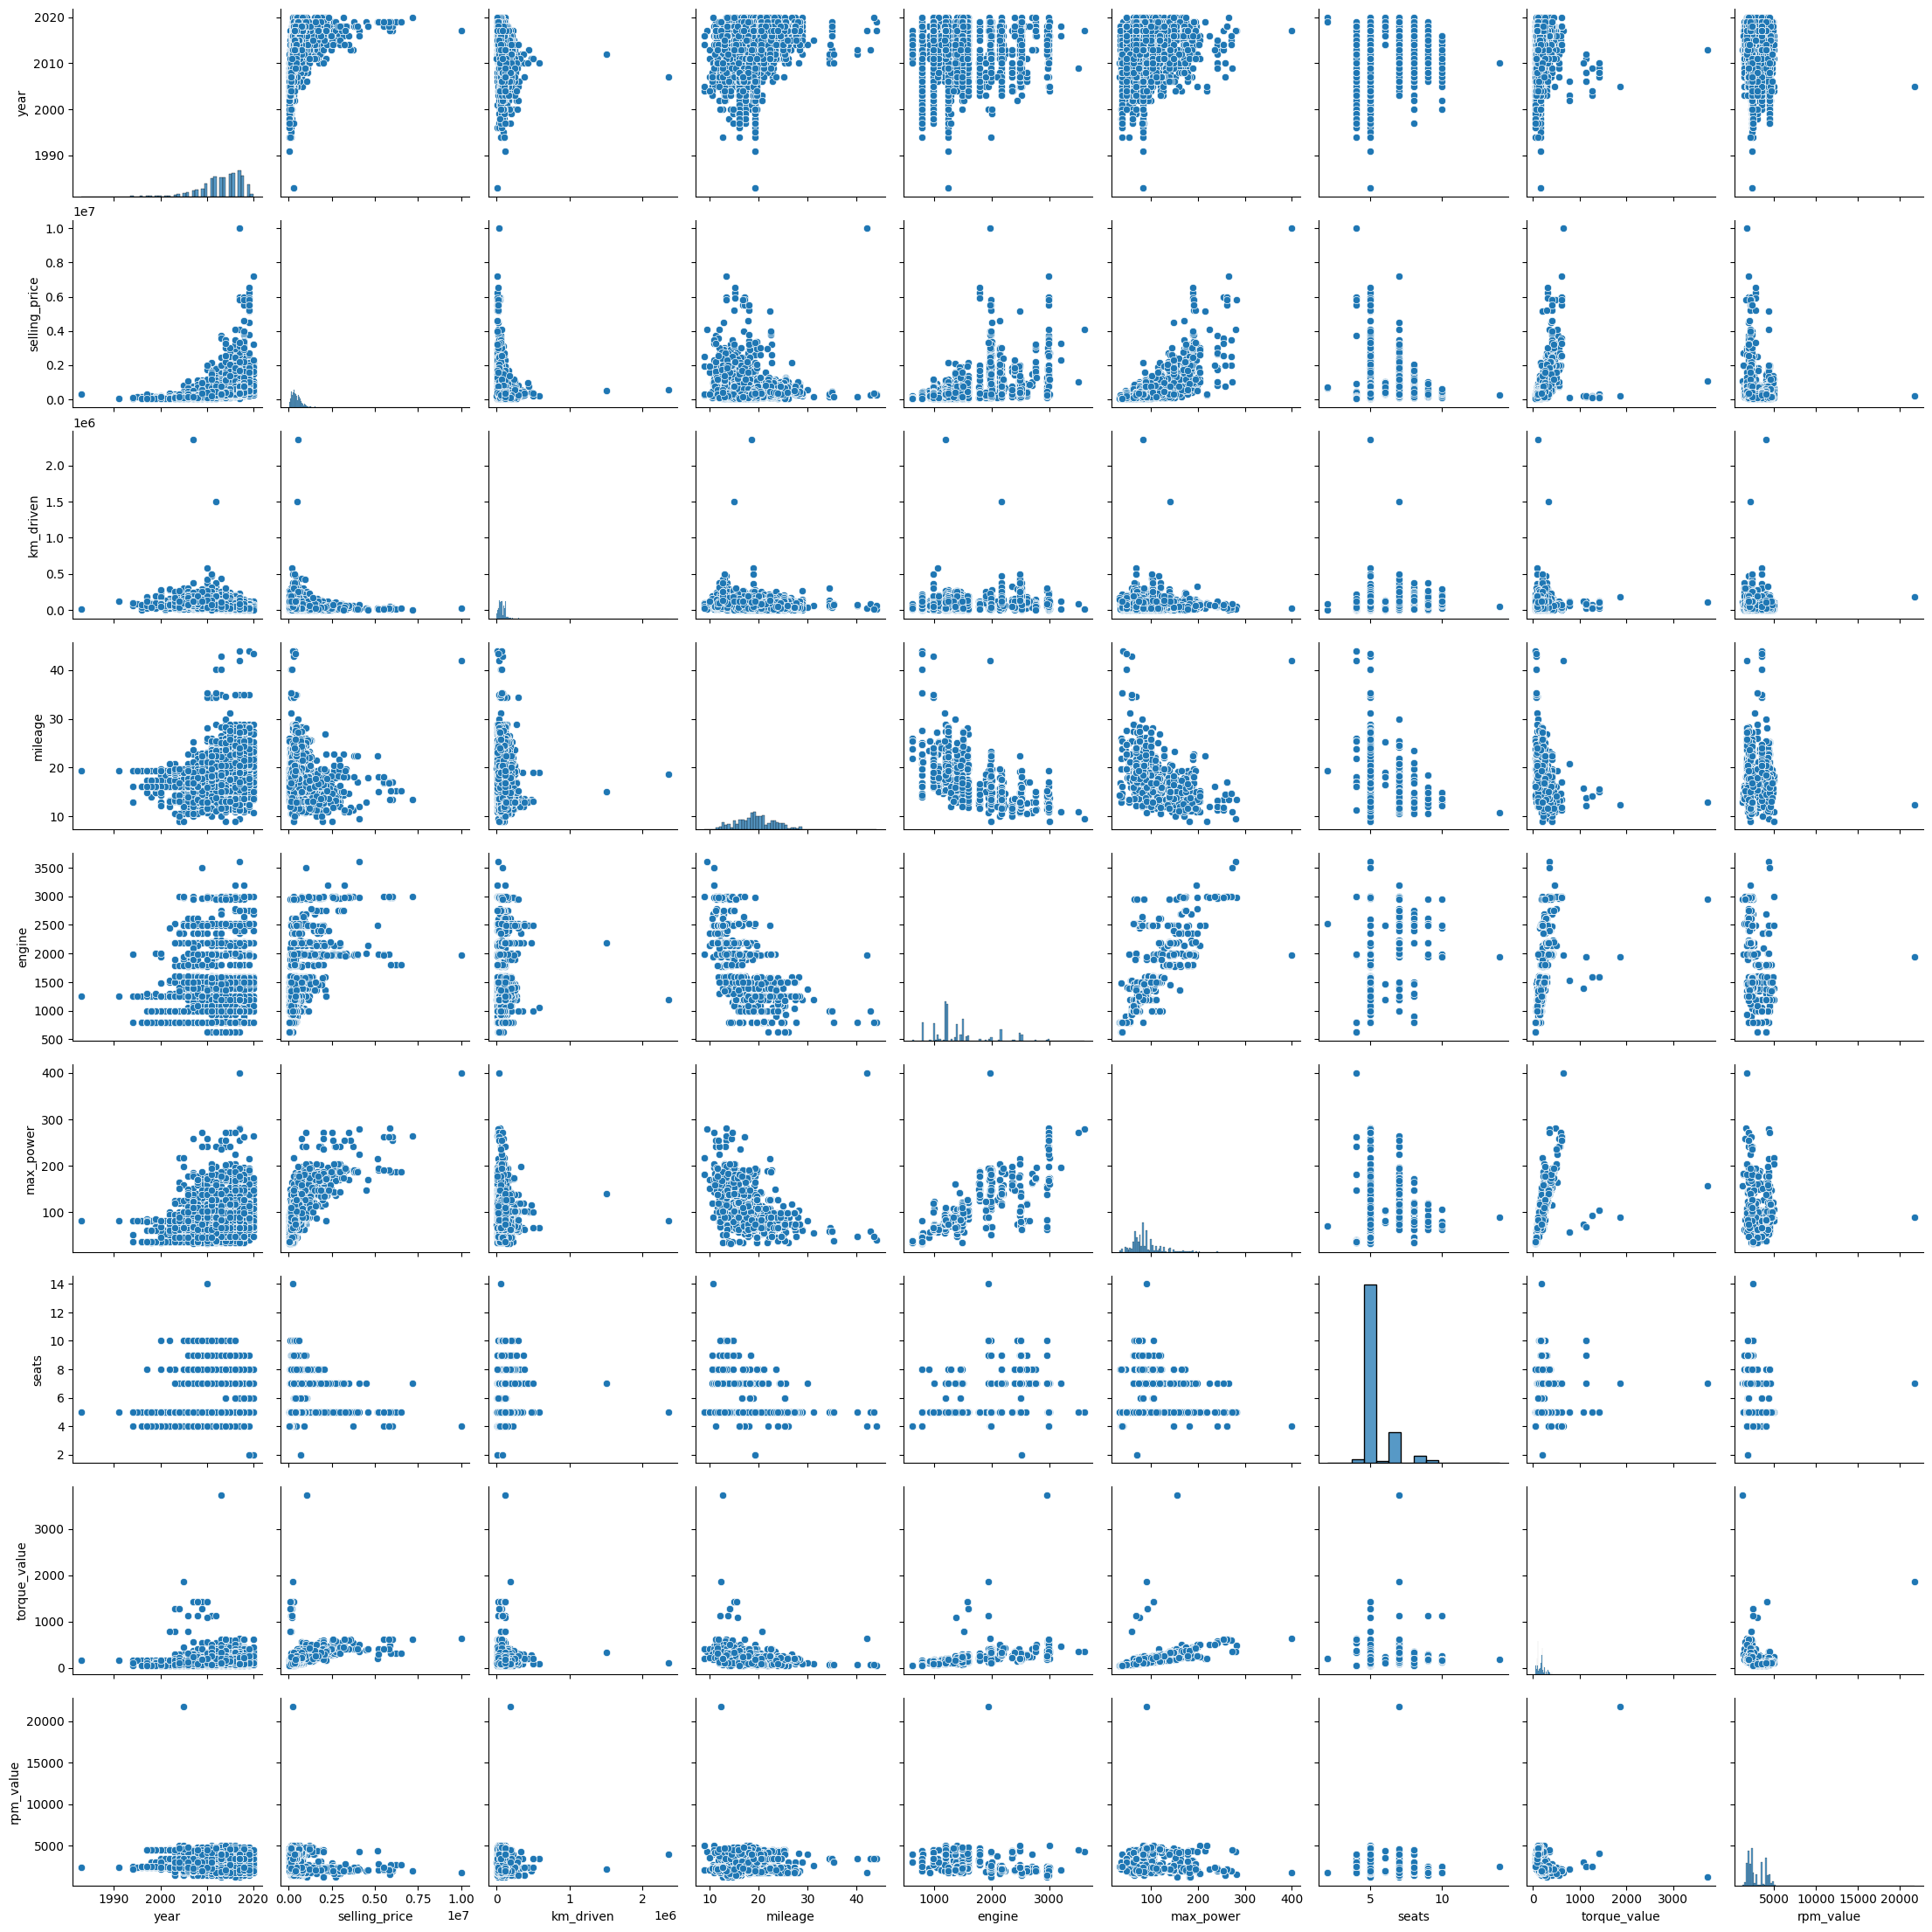

In [31]:
sns.pairplot(df_train)
plt.show()

**Основываясь на графиках можно сделать вывод о связи признаков с целевой переменной:**
- цена продажи зависит от года автомобиля (year). Высокую цену продажи имеют новые автомобили.
- цена продажи зависит от объема двигателя (engine). Чем больше объем двигателя, тем больше стоит автомобиль.
- цена продажи зависит от максимальной мощности автомобиля (max_power). Чем мощнее автомобиль, тем больше его цена.
- автомобили с наименьшим значением крутящего момента имеют низкую стоимость (torque_value).
- чем больше проехал автомобиль, тем ниже его стоимость (km_driven)

**Также заметна зависимость признаков друг от друга:**
- автомобили с мощностью (max_power) > 100bhp появляются только после 2005 года (year), можно сказать, что у новых автомобилей увеличилась максимальная мощность
- также на новых автомобилях ~2020 года меньше пробег (km_driven)
- крутящий момент (torque_value) имеет зависимость с максимальной мощностью (max_power) и объемом двигателя (engine). Эти параметры имеют положительную корреляцию между собой.
- mileage имеет зависимость с максимальной мощностью (max_power) и объемом двигателя (engine). Чем больше топлива расходуется на километр, тем меньше максимальная мощность и объем двигателя.

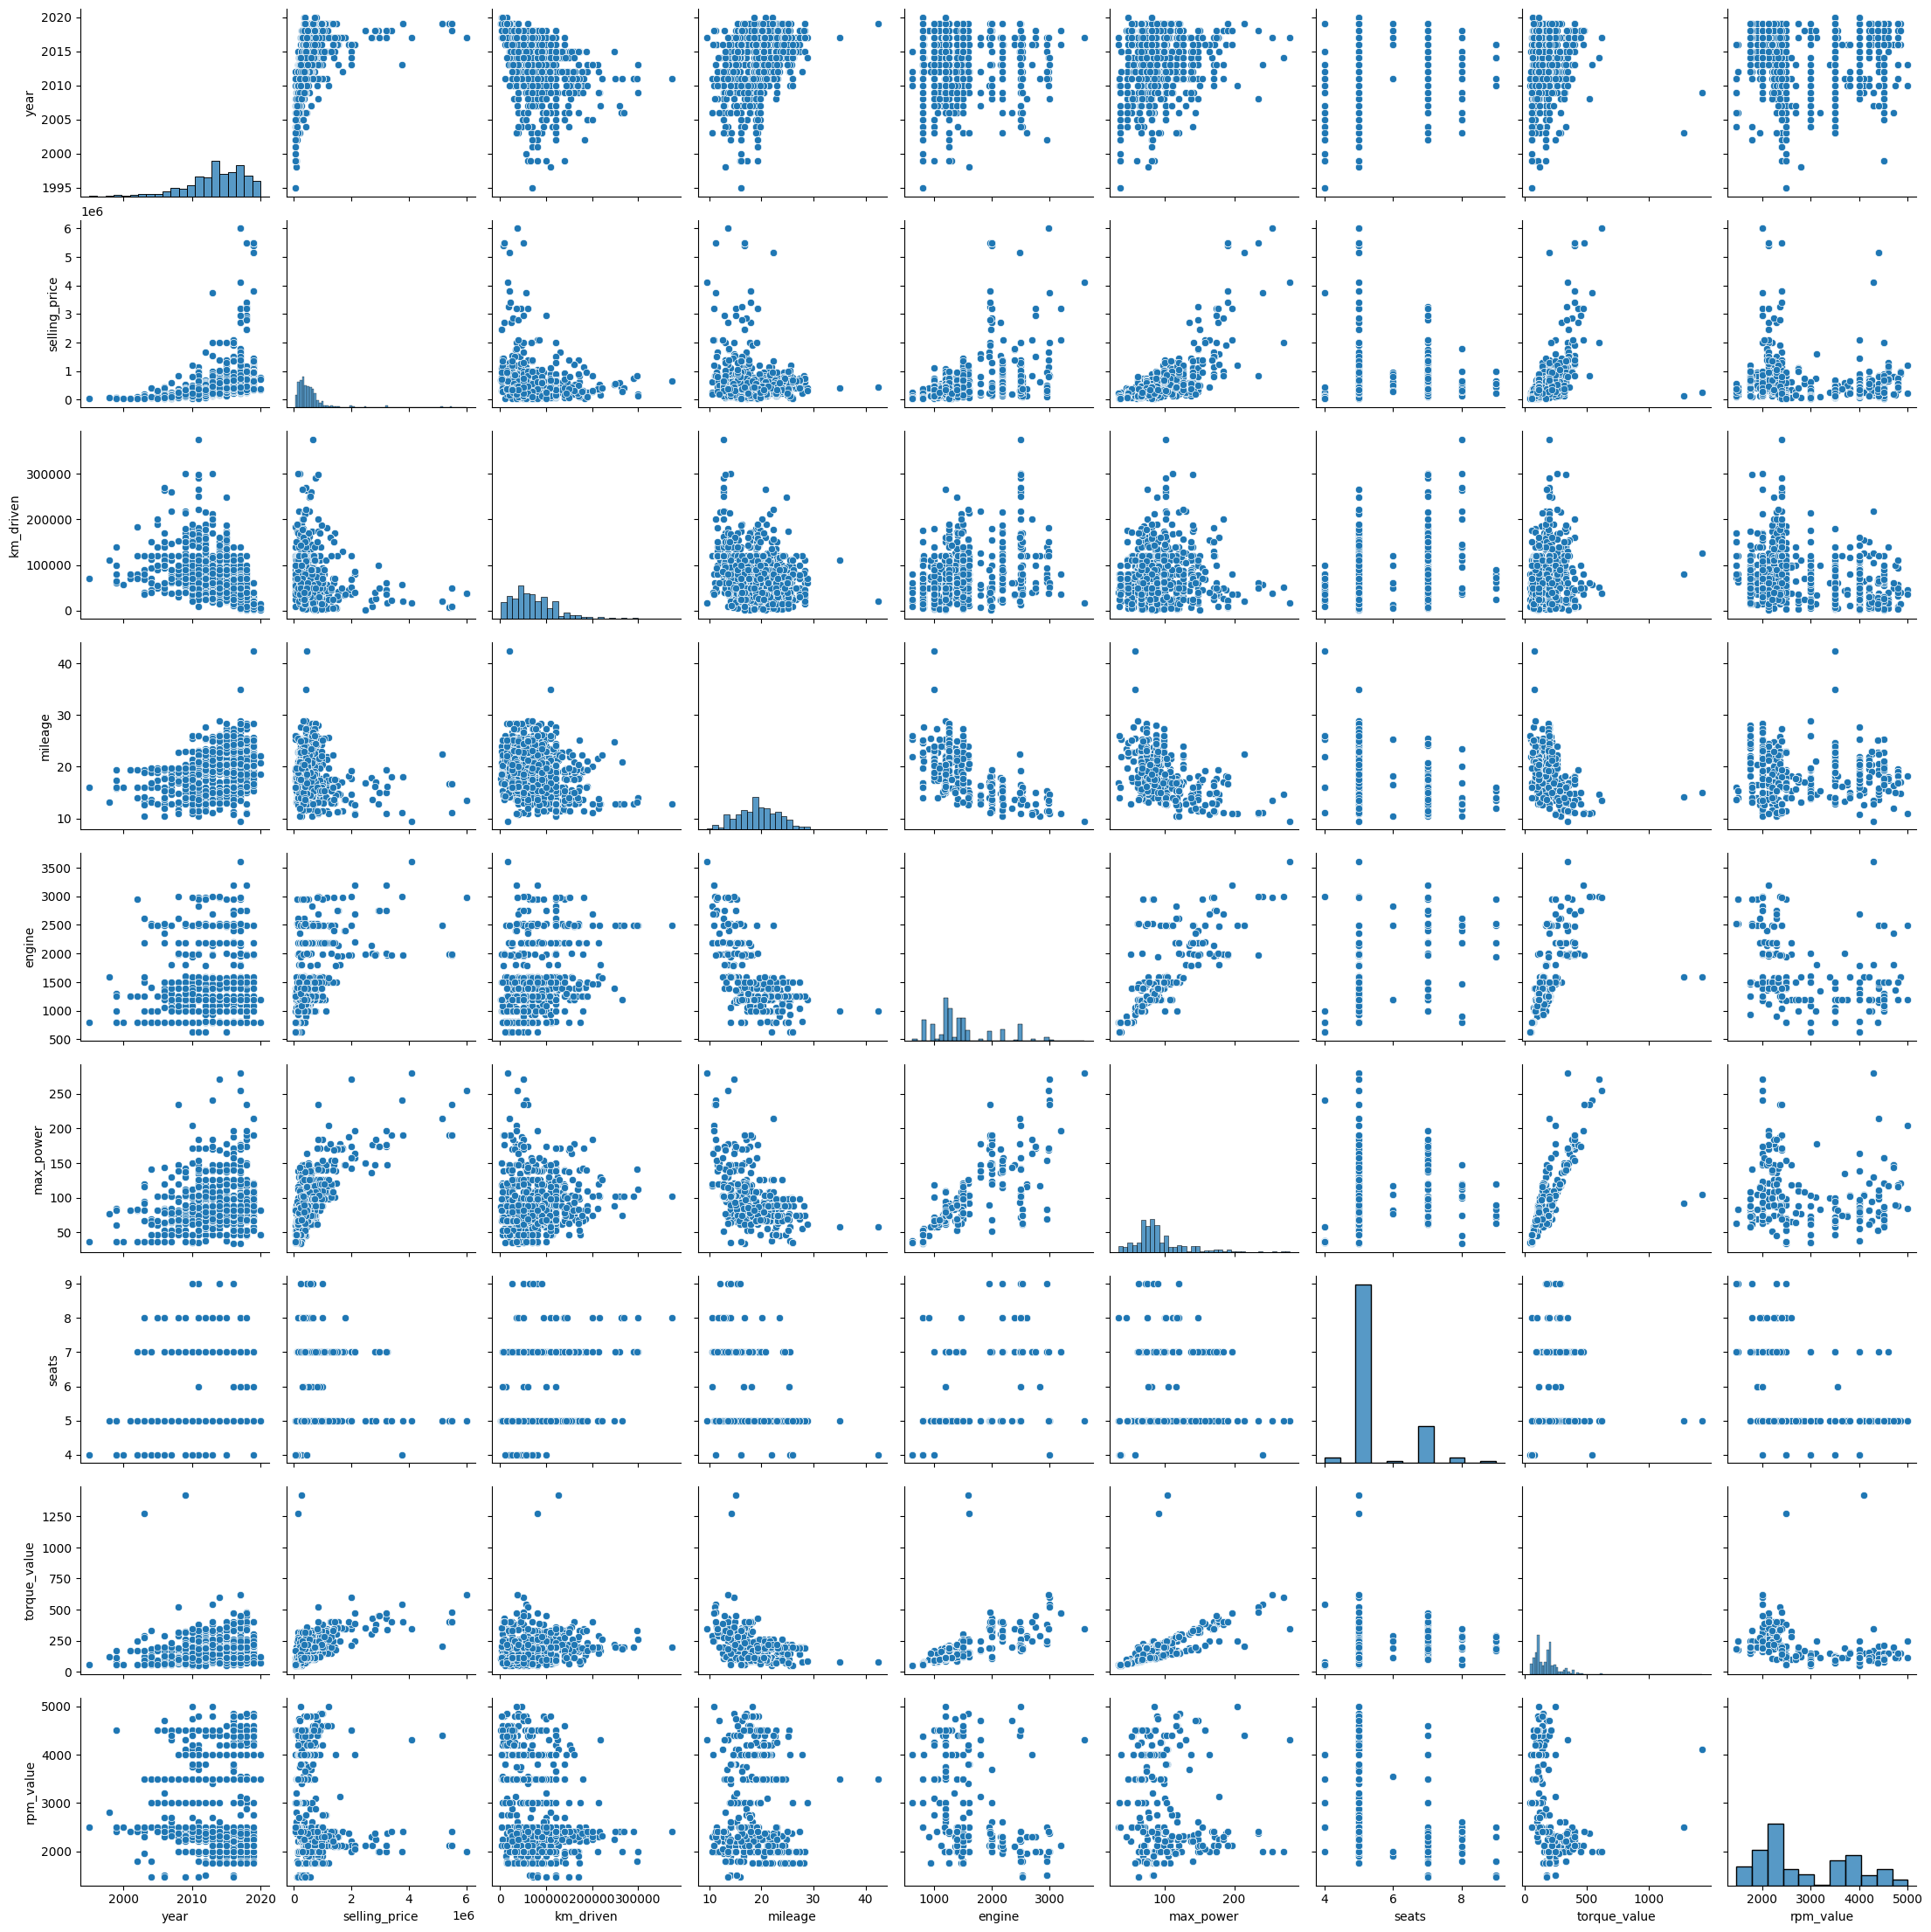

In [32]:
sns.pairplot(df_test)
plt.show()

Совокупности при разделении на train и test оказались похожими.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


<Axes: >

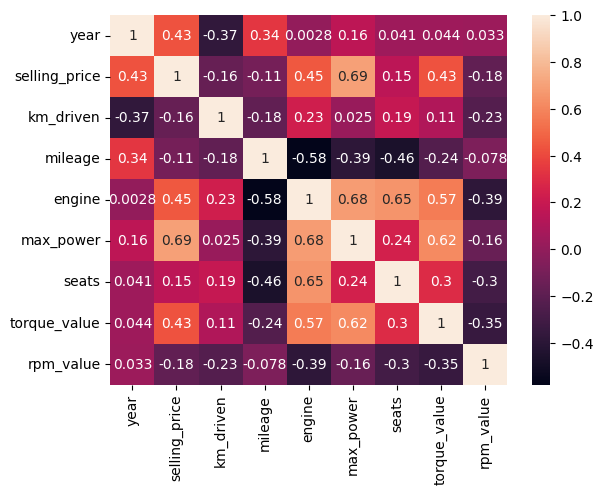

In [33]:
corr = df_train[df_train.select_dtypes(include='number').columns].corr()
sns.heatmap(corr, annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

Наименее скоррелированы между собой:
 - **engine и year: 0.0028**
 - **max_power и km_driven: 0.025**

Довольно сильная положительная линейная зависимость наблюдается между:
 - **max_power и selling_price: 0.69**
 - **max_power и engine: 0.68**
 - **seats и engine: 0.65**
 - **torque_value и engine: 0.57**
 - **torque_value и max_power: 0.62**

Подтвердились выводы из Задания 6

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

Также можно посмотреть корреляцию Спирмена. Корреляция Пирсона показывает линейные связи, можно попробовать найти "скрытые" зависимости с помощью корреляции Спирмена.

<Axes: >

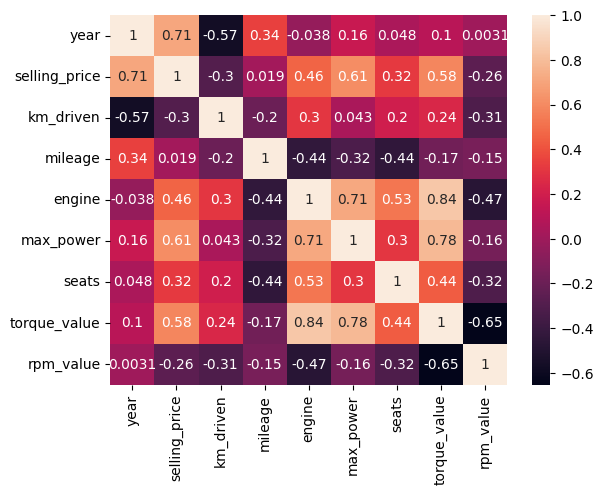

In [34]:
corr = df_train[df_train.select_dtypes(include='number').columns].corr(method='spearman')
sns.heatmap(corr, annot=True)

Также наблюдается сильная положительная корреляция между:
- **selling_price и year: 0.71**  
- **torque_value и selling_price: 0.58**

Сильная отрицательная корреляция между:
- **km_driven и year: -0.57**
- **rpm_value и torque_value: -0.65**

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [35]:
y_train = df_train['selling_price']
X_train = df_train[df_train.select_dtypes(include='number').columns].drop('selling_price', axis=1)

In [36]:
# столбец torque не стал удалять, а разделил на 2
# assert X_train.shape == (5840, 6)
assert X_train.shape == (5840, 8)

In [37]:
y_test = df_test['selling_price']
X_test = df_test[df_test.select_dtypes(include='number').columns].drop('selling_price', axis=1)

In [38]:
# столбец torque не стал удалять, а разделил на 2
# assert X_test.shape == (1000, 6)
assert X_test.shape == (1000, 8)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

r2 = r2_score(y_test, linreg_pred)
mse = MSE(y_test, linreg_pred)

r2, mse

(0.5996945467040521, 230107005532.3025)

$R^2 = 0.6, MSE = 230107005532$  
$R^2$ имеет неплохое значение  
$MSE$ показывает, что модель ошибается на значительную часть стоимости автомобиля (такого же порядка как целевая переменная)

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train[X_train.columns] = scaler.transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [41]:
linreg_st = LinearRegression()
linreg_st.fit(X_train, y_train)
linreg_st_pred = linreg_st.predict(X_test)

r2 = r2_score(y_test, linreg_st_pred)
mse = MSE(y_test, linreg_st_pred)

r2, mse

(0.599694546704054, 230107005532.30136)

Стандартизация не повлияла на качество модели.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [42]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque_value', 'rpm_value'],
      dtype='object')

In [43]:
linreg_st.coef_

array([161143.3068485 , -50145.13886876,   1065.44564401,  20910.99738715,
       329799.71072759, -28771.68586454,   2031.36762523, -60003.79371891])

Наиболее информативным оказался признак **max_power**

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

r2 = r2_score(y_test, lasso_pred)
mse = MSE(y_test, lasso_pred)

r2, mse

(0.5996933656045269, 230107684462.03662)

In [45]:
lasso.coef_

array([161143.01191788, -50144.01132165,   1063.93767001,  20906.86158683,
       329800.58845514, -28768.87558946,   2030.99821039, -60003.3897726 ])

Качество модели почти не изменилось.

L1-регуляризация не занулила веса. Это может быть связано с тем, что регуляризация слабо "штрафует" веса. Можно попробовать увеличить гиперпараметр регуляризации, чтобы сильнее штрафовать веса и занулить какой-то из них.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [45]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

In [46]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': range(1, 30000, 100)}
gs_lasso = GridSearchCV(Lasso(), params, cv=cv, scoring='r2')
gs_lasso.fit(X_train, y_train)

gs_lasso.best_score_, gs_lasso.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


(0.5986631360946619, {'alpha': 7501})

In [47]:
X_train.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque_value', 'rpm_value'],
      dtype='object')

In [48]:
gs_lasso.best_estimator_.coef_

array([155185.55589407, -42427.66930994,      0.        ,      0.        ,
       334169.64918798,  -7559.13482238,      0.        , -52375.62594352])

Грид-сёрчу пришлось обучать 3000 моделей (300 различных alpha * 10 фолдов)

У лучшей модели получился коэффициент alpha = 7501

Удалось занулить веса столбцов mileage, engine, torque_value

In [49]:
pred_gs_lasso = gs_lasso.predict(X_test)
r2 = r2_score(y_test, pred_gs_lasso)
mse = MSE(y_test, pred_gs_lasso)

r2, mse

(0.5899441526465339, 235711810465.29138)

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNet

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

params = {'alpha': range(1, 30000, 1000), 'l1_ratio':[i/10 for i in range(0, 11)]}
gs_elastic = GridSearchCV(ElasticNet(), params, cv=cv, scoring='r2')
gs_elastic.fit(X_train, y_train)

gs_elastic.best_score_, gs_elastic.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


(0.5986575964861255, {'alpha': 7001, 'l1_ratio': 1.0})

Грид-сёрчу пришлось обучать 3000 моделей (30 различных alpha * 10 значений l1_ratio * 10 фолдов)

l1_ratio = 1, alpha ~ lasso_alpha. Гиперпараметры соответсвуют гиперпараметрам Lasso

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [51]:
# your code here

Из названия автомобиля можно вычленить марку. Не буду удалять столбец, а получу из него категорию марки автомобиля.

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [52]:
# Из названия автомобиля можно вычленить марку. Не буду удалять столбец, а получу из него категорию марки автомобиля.
def get_car_make(car_name:str)->str:
    return car_name.split(' ')[0]

In [53]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'torque_value', 'rpm_value'],
      dtype='object')

In [54]:
X_train_cat = df_train[df_train.columns].drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test[df_test.columns].drop(['selling_price', 'name'], axis=1)

In [55]:
X_train_cat['car_maker'] = df_train['name'].map(lambda n: get_car_make(n))
X_test_cat['car_maker'] = df_test['name'].map(lambda n: get_car_make(n))

In [56]:
# assert X_train_cat.shape == (5840, 10)
# +3 предобработанных столбца
assert X_train_cat.shape == (5840, 13)

In [57]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,car_maker
count,5840,5840,5840,5840,5840
unique,4,3,2,5,30
top,Diesel,Individual,Manual,First Owner,Maruti
freq,3177,5223,5336,3603,1804


Стобец с марками автомобилей содержит 30 различных марок. Лучше не кодировать его с помощью OHE, т.к. это добавит множество признаков - 29 новых столбцов, что может плохо сказаться на качестве модели. Стобец будет закодирован с помощью TargetEncoding - замена марки на среднее значение целевой переменной для этой марки

In [58]:
!pip install category_encoders -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.5 MB/s eta 0:00:00


In [59]:
from category_encoders import TargetEncoder

te = TargetEncoder()

cat_encod = te.fit_transform(X_train_cat[['car_maker']], y_train)
cat_encod_test = te.transform(X_test_cat[['car_maker']])

In [60]:
X_train_cat['car_maker_encoded'] = cat_encod['car_maker']
X_test_cat['car_maker_encoded'] = cat_encod_test['car_maker']
X_train_cat.drop('car_maker', axis=1, inplace=True)
X_test_cat.drop('car_maker', axis=1, inplace=True)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [61]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

features = list(X_train_cat.select_dtypes(include='object').columns)
features.append('seats')

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.set_output(transform='pandas')
for f in features:
    X_train_cat = pd.concat([X_train_cat, ohe.fit_transform(X_train_cat[[f]])], axis=1)
    X_train_cat.drop(f, axis=1, inplace=True)
    X_test_cat = pd.concat([X_test_cat, ohe.transform(X_test_cat[[f]])], axis=1)
    X_test_cat.drop(f, axis=1, inplace=True)

In [62]:
X_test_cat.shape, X_train_cat.shape

((1000, 26), (5840, 26))

In [63]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          5840 non-null   float64
 1   km_driven                     5840 non-null   float64
 2   mileage                       5840 non-null   float64
 3   engine                        5840 non-null   int64  
 4   max_power                     5840 non-null   float64
 5   torque_value                  5840 non-null   float64
 6   rpm_value                     5840 non-null   float64
 7   car_maker_encoded             5840 non-null   float64
 8   fuel_Diesel                   5840 non-null   float64
 9   fuel_LPG                      5840 non-null   float64
 10  fuel_Petrol                   5840 non-null   float64
 11  seller_type_Individual        5840 non-null   float64
 12  seller_type_Trustmark Dealer  5840 non-null   float64
 13  tra

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [i%100 for i in range(0, 200)]}
gs_ridge = GridSearchCV(Ridge(), params, cv=cv, scoring='r2')
gs_ridge.fit(X_train_cat, y_train)

gs_ridge.best_score_, gs_ridge.best_params_

(0.716937790463162, {'alpha': 1})

In [65]:
pred_gs_ridge = gs_ridge.best_estimator_.predict(X_test_cat)

r2 = r2_score(y_test, pred_gs_ridge)
mse = MSE(y_test, pred_gs_ridge)

r2, mse

(0.7082132361464333, 167727364020.3616)

**Значительно удалось улучшить качество прогнозов**

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [66]:
def business_metric(y_true, y_pred):
    if len(y_true) != len(y_pred):
        raise ValueError('Не совпадает количество значений')
    count = 0
    for i in range(len(y_true)):
        diff = y_true[i] / y_pred[i]
        if diff <= 1.1 and diff >= 0.9:
            count += 1
    return count / len(y_true)

In [67]:
print(f"Для линейной регрессии: {business_metric(y_test, linreg_pred)}")
print(f"Для стандартизированной линейной регрессии: {business_metric(y_test, linreg_st_pred)}")
print(f"Для линейной регрессии + l1 регуляризатор: {business_metric(y_test, lasso_pred)}")
print(f"Для линейной регрессии + l1 регуляризатор и оптимальными гипрпараметрами: {business_metric(y_test, pred_gs_lasso)}")
print(f"Для линейной регрессии + l2 регуляризатор и оптимальными гиперпараметрами: {business_metric(y_test, pred_gs_ridge)}")

Для линейной регрессии: 0.243
Для стандартизированной линейной регрессии: 0.243
Для линейной регрессии + l1 регуляризатор: 0.243
Для линейной регрессии + l1 регуляризатор и оптимальными гипрпараметрами: 0.245
Для линейной регрессии + l2 регуляризатор и оптимальными гиперпараметрами: 0.269


**Лучше всего решает задачу бизнеса последняя из обученных моделей - Ridge модель, обученная с категориальными признаками**

Соберем всю модель в пайплайн, чтобы можно было использовать ее в сервисе

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

class StrToNum(BaseEstimator, TransformerMixin):
    def set_output(self, transform):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Выделение чиловых признаков
        X = X.copy()
        X['mileage'] = X['mileage'].map(lambda m: mileage_to_kmpl(m) if isinstance(m, str) else m)
        X['engine'] = X['engine'].map(lambda m: int(m.split(' ')[0]) if isinstance(m, str) else m)
        X['max_power'] = X['max_power'].map(lambda m: (np.nan if (len(m.split(' ')[0]) == 0 or m == '0') else float(m.split(' ')[0])) if isinstance(m, str) else m)
        torque_to_values(X)
        X.drop('torque', axis=1, inplace=True)
        return X

    def predict(self, X):
        return self.transform(X)

class CarNameToMaker(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['car_maker'] = X['name'].map(lambda n: get_car_make(n))
        X.drop('name', axis=1, inplace=True)
        return X

    def predict(self, X):
        return self.transform(X)

class CategoryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = TargetEncoder(cols=['car_maker'])
        self.ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
        self.ohe.set_output(transform='pandas')

    def fit(self, X, y=None):
        y = y.copy()
        self.encoder.fit(X['car_maker'], y)
        self.ohe.fit(X[['fuel', 'seller_type', 'transmission', 'owner', 'seats']], y)
        return self

    def transform(self, X):
        X = X.copy()
        X['car_maker_encoded'] = self.encoder.transform(X['car_maker'])['car_maker']
        X.drop('car_maker', axis=1, inplace=True)
        upd = self.ohe.transform(X[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
        X = pd.concat([X, upd], axis=1)
        X.drop(['fuel', 'seller_type', 'transmission', 'owner', 'seats'], axis=1, inplace=True)
        return X

    def predict(self, X):
        return self.transform(X)

class NumericalTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = SimpleImputer(strategy="median")
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.imputer.fit(X[X.select_dtypes(include='number').columns])
        self.scaler.fit(X[X.select_dtypes(include='number').columns])
        return self

    def transform(self, X):
        X = X.copy()
        X[X.select_dtypes(include='number').columns] = self.imputer.transform(X[X.select_dtypes(include='number').columns])
        X['engine'] = X['engine'].astype(int)
        X['seats'] = X['seats'].astype(int)
        X[X.select_dtypes(include='number').columns] = self.scaler.transform(X[X.select_dtypes(include='number').columns])
        return X

    def predict(self, X):
        return self.transform(X)

model = Pipeline(steps=[
    ("str_to_num", StrToNum()),
    ("scaler", NumericalTransformer()),
    ("car_maker", CarNameToMaker()),
    ("cat_encoders", CategoryTransformer()),
    ("regressor", GridSearchCV(Ridge(), {'alpha': [i%100 for i in range(0, 200)]}, cv=KFold(n_splits=10, shuffle=True, random_state=42), scoring='r2'))
])

Обучу пайплайн-модель на начальных данных, очистив их от дубликатов.  
Также проверю, что модель из пайплайна соответсвует лучшей моделе, сравнив по r2

In [69]:
train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

In [70]:
df_feature_columns = train.columns.drop('selling_price')
train.drop_duplicates(subset=df_feature_columns, keep='first', ignore_index=True, inplace=True)


X_tr = train.drop('selling_price', axis=1)
y_tr = train['selling_price']

X_ts = test.drop('selling_price', axis=1)
y_ts = test['selling_price']

In [71]:
model.fit(X_tr, y_tr)

Pipeline(steps=[('str_to_num', StrToNum()), ('scaler', NumericalTransformer()),
                ('car_maker', CarNameToMaker()),
                ('cat_encoders', CategoryTransformer()),
                ('regressor',
                 GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                              estimator=Ridge(),
                              param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                    9, 10, 11, 12, 13, 14, 15,
                                                    16, 17, 18, 19, 20, 21, 22,
                                                    23, 24, 25, 26, 27, 28, 29, ...]},
                              scoring='r2'))])

In [72]:
pred = model.predict(X_ts)

In [73]:
r2_score(y_test, pred)

0.708208271252502

Сохраню модель в pickle-файл, чтобы использовать в сервисе

In [74]:
import pickle
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

# **Часть Благодарственная**

**Считаю, что это кот Елены @murr4a**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

